<a href="https://colab.research.google.com/github/Khemapsorn/data_viz_2022/blob/main/sir_seir_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libralies
import pandas as pd # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # พล็อตกราฟต่างๆ 

from scipy.integrate import odeint #Integrate a system of ordinary differential equations.
                                                # func(y, t0, ...) 

%config InlineBackend.figure_format = 'retina'

# SIR model

In [2]:
# SIR model
# Differential equation สมการเชิงอนุพันธ์
def deriv(y, t, N, beta, gamma): # ตัวแปร
    S, I, R = y
    dSdt =(-beta*S*I) / N
    dIdt = ((beta*S*I) / N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

## กำหนดค่าต่าง ๆ (เตรียมข้อมูลแบบจำลอง)

In [3]:
# Number of population
N = 1000

# Time period (100 days)
t = np.arange(0,100,1)

# Initial number of infected and recoverd
I0 = 1
R0 = 0

#Initial susceptible to infection (Start with 1)
S0 = N - I0 - R0

# Set Beta and Gamma
beta = 2
gamma = 28

# Constant rate beta and gamma rates
b = 1 / beta
g = 1 / gamma

#Integration SIR model
simulationresult = odeint(deriv, (S0, I0, R0), t, args = (N,b,g))

#Summary
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Infectious','Recovery'])
simulationResult = simulationResult.astype(np.int32)

In [9]:
t = np.arange(0,100,1)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [10]:
S0 = N - I0 - R0 # 1000-1-0
S0

999

In [8]:
simulationresult = odeint(deriv, (S0, I0, R0), t, args = (N,b,g))
simulationresult

array([[9.99000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.98364713e+02, 1.58984909e+00, 4.54374848e-02],
       [9.97355739e+02, 2.52659948e+00, 1.17661645e-01],
       [9.95754880e+02, 4.01271607e+00, 2.32403989e-01],
       [9.93218982e+02, 6.36647447e+00, 4.14543827e-01],
       [9.89212053e+02, 1.00846573e+01, 7.03289917e-01],
       [9.82906016e+02, 1.59338935e+01, 1.16009096e+00],
       [9.73043794e+02, 2.50757996e+01, 1.88040637e+00],
       [9.57770330e+02, 3.92191863e+01, 3.01048361e+00],
       [9.34471659e+02, 6.07588062e+01, 4.76953442e+00],
       [8.99737926e+02, 9.27869841e+01, 7.47508954e+00],
       [8.49687766e+02, 1.38748960e+02, 1.15632737e+01],
       [7.80983928e+02, 2.01430343e+02, 1.75857289e+01],
       [6.92682420e+02, 2.81161640e+02, 2.61559393e+01],
       [5.88276297e+02, 3.73898127e+02, 3.78255755e+01],
       [4.76258327e+02, 4.70827788e+02, 5.29138850e+01],
       [3.67798507e+02, 5.60828669e+02, 7.13728240e+01],
       [2.72559017e+02, 6.34662

In [7]:
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Infectious','Recovery'])
simulationResult

,Susceptible,Infectious,Recovery
0,999.000000,1.000000,0.000000
1,998.364713,1.589849,0.045437
2,997.355739,2.526599,0.117662
3,995.754880,4.012716,0.232404
4,993.218982,6.366474,0.414544
...,...,...,...
95,0.001868,57.888736,942.109395
96,0.001816,55.857816,944.140368
97,0.001767,53.898146,946.100088
98,0.001721,52.007226,947.991054


In [15]:
simulationResult = simulationResult.astype(np.int32) # ปรับตัวเลขเป็นจำนวนเต็มของตารางข้างบน
simulationResult

,Susceptible,Infectious,Recovery
0,999,1,0
1,998,1,0
2,997,2,0
3,995,4,0
4,993,6,0
...,...,...,...
95,0,57,942
96,0,55,944
97,0,53,946
98,0,52,947


## พล็อตแบบจำลอง

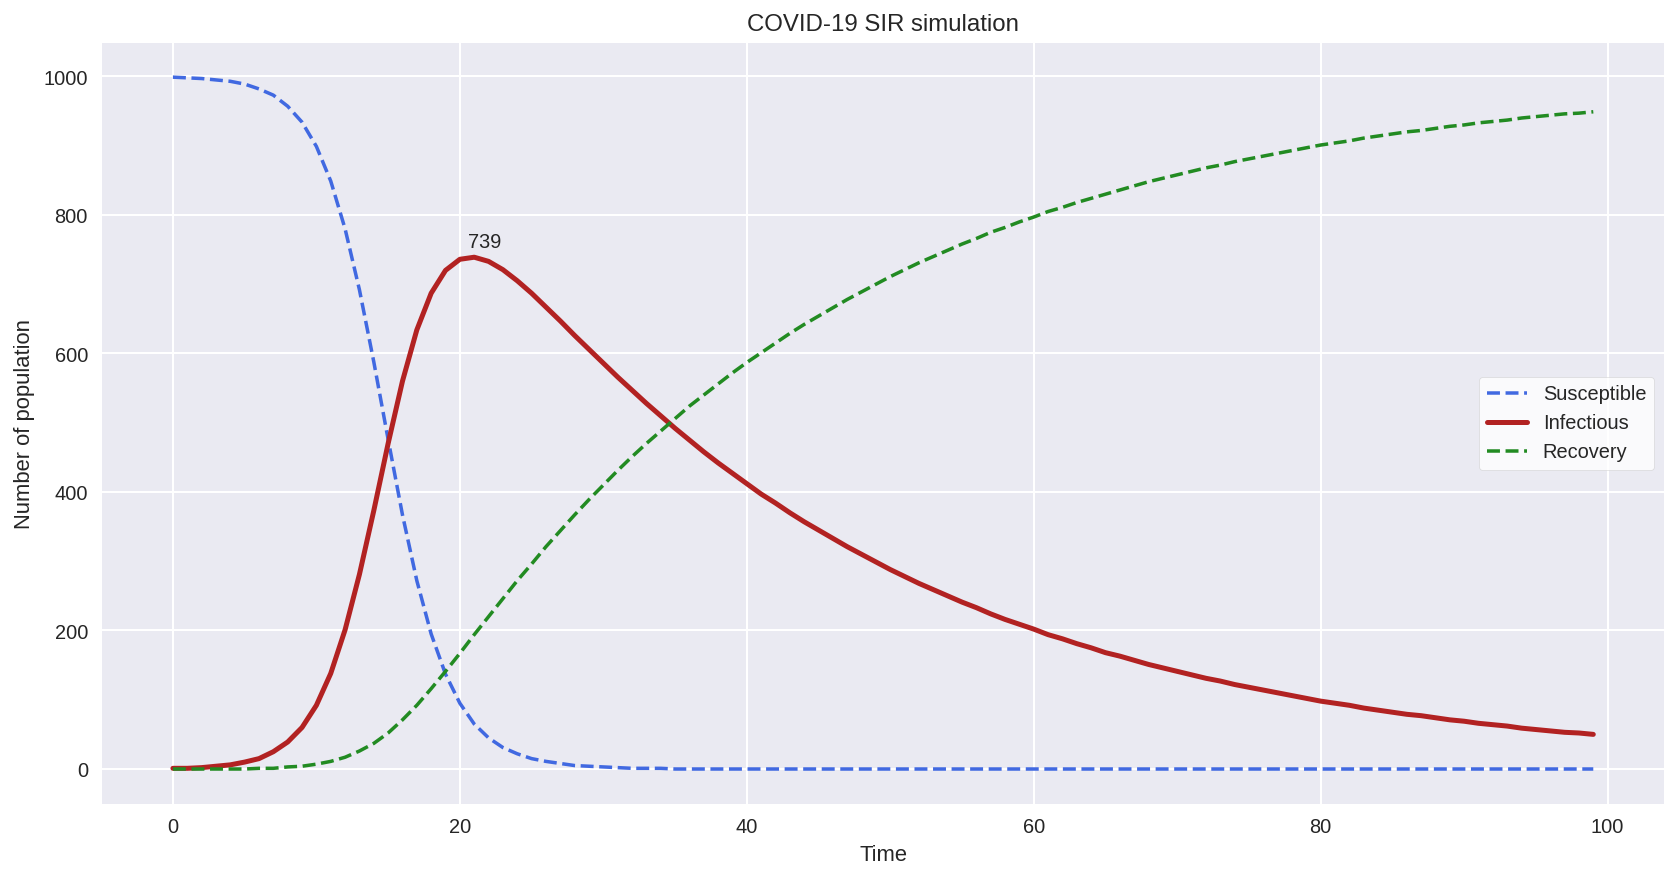

In [4]:
# plot the simulation
plt.figure (figsize = (14, 7)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('COVID-19 SIR simulation') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--',label = 'Susceptible') # S
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') #I
    plt.plot(simulationResult['Recovery'], c = 'forestgreen', linestyle = '--' ,label = 'Recovery') # R
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()

# SEIR model

In [16]:
# SEIR model
# Differential equations
def deriv(y, t, N, beta, gamma, sigma): # เพิ่ม parameter sigma 
    S, E, I, R = y
    dSdt = -beta *S *I / N
    dEdt = beta * S *I / N - sigma *E
    dIdt = sigma *E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

## กำหนดค่าต่าง ๆ (เตรียมข้อมูลแบบจำลอง)

In [22]:
# Set Beta, Gamma Sigma
beta = 2
gamma = 28
sigma = 14

# Constant rate beta, gamma rates and sigma rates
b = 1 / 2  #b = 1 / beta
g = 1 / 28 #g = 1 / gamma
s= 1 / 14  #s = 1 / sigma

#Initial number of exposed, infected and recovered
E0 = 1
I0 = 0
R0 = 0
  
#Initial susceptible to infection (Start with 1)
S0 = N - E0 - I0 - R0

#Integration SEIR model
simulationresult = odeint(deriv, (S0, E0, I0, R0), t, args = (N, b, g, s))

#Summary
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Exposed', 'Infectious', 'Recovery'])
simulationResult = simulationResult.astype(np.int32)

In [20]:
#Initial susceptible to infection (Start with 1)
S0 = N - E0 - I0 - R0 # 1000 - 1 - 0 -0
S0

999

In [21]:
#Integration SEIR model
simulationresult = odeint(deriv, (S0, E0, I0, R0), t, args = (N, b, g, s))
simulationresult

array([[9.99000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.98982734e+02, 9.47921804e-01, 6.81096428e-02, 1.23452921e-03],
       [9.98932753e+02, 9.30993793e-01, 1.31444664e-01, 4.80831058e-03],
       [9.98851812e+02, 9.45106835e-01, 1.92485012e-01, 1.05962451e-02],
       [9.98740514e+02, 9.87544214e-01, 2.53386025e-01, 1.85556711e-02],
       [9.98598450e+02, 1.05675448e+00, 3.16079027e-01, 2.87166360e-02],
       [9.98424286e+02, 1.15218333e+00, 3.82354760e-01, 4.11754232e-02],
       [9.98215822e+02, 1.27415377e+00, 4.53933772e-01, 5.60908271e-02],
       [9.97970004e+02, 1.42378548e+00, 5.32527408e-01, 7.36827533e-02],
       [9.97682928e+02, 1.60294703e+00, 6.19892167e-01, 9.42328790e-02],
       [9.97349797e+02, 1.81423576e+00, 7.17879787e-01, 1.18087171e-01],
       [9.96964873e+02, 2.06098176e+00, 8.28485070e-01, 1.45660142e-01],
       [9.96521393e+02, 2.34727331e+00, 9.53893050e-01, 1.77440804e-01],
       [9.96011471e+02, 2.67800205e+00, 1.09652700e

In [23]:
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Exposed', 'Infectious', 'Recovery'])
simulationResult

,Susceptible,Exposed,Infectious,Recovery
0,999.000000,1.000000,0.000000,0.000000
1,998.982734,0.947922,0.068110,0.001235
2,998.932753,0.930994,0.131445,0.004808
3,998.851812,0.945107,0.192485,0.010596
4,998.740514,0.987544,0.253386,0.018556
...,...,...,...,...
95,0.204272,58.702604,334.303274,606.789851
96,0.173164,54.685799,326.550202,618.590835
97,0.147363,50.940785,318.796987,630.114864
98,0.125894,47.449767,311.062072,641.362267


In [24]:
simulationResult = simulationResult.astype(np.int32)
simulationResult

,Susceptible,Exposed,Infectious,Recovery
0,999,1,0,0
1,998,0,0,0
2,998,0,0,0
3,998,0,0,0
4,998,0,0,0
...,...,...,...,...
95,0,58,334,606
96,0,54,326,618
97,0,50,318,630
98,0,47,311,641


## พล็อตแบบจำลอง

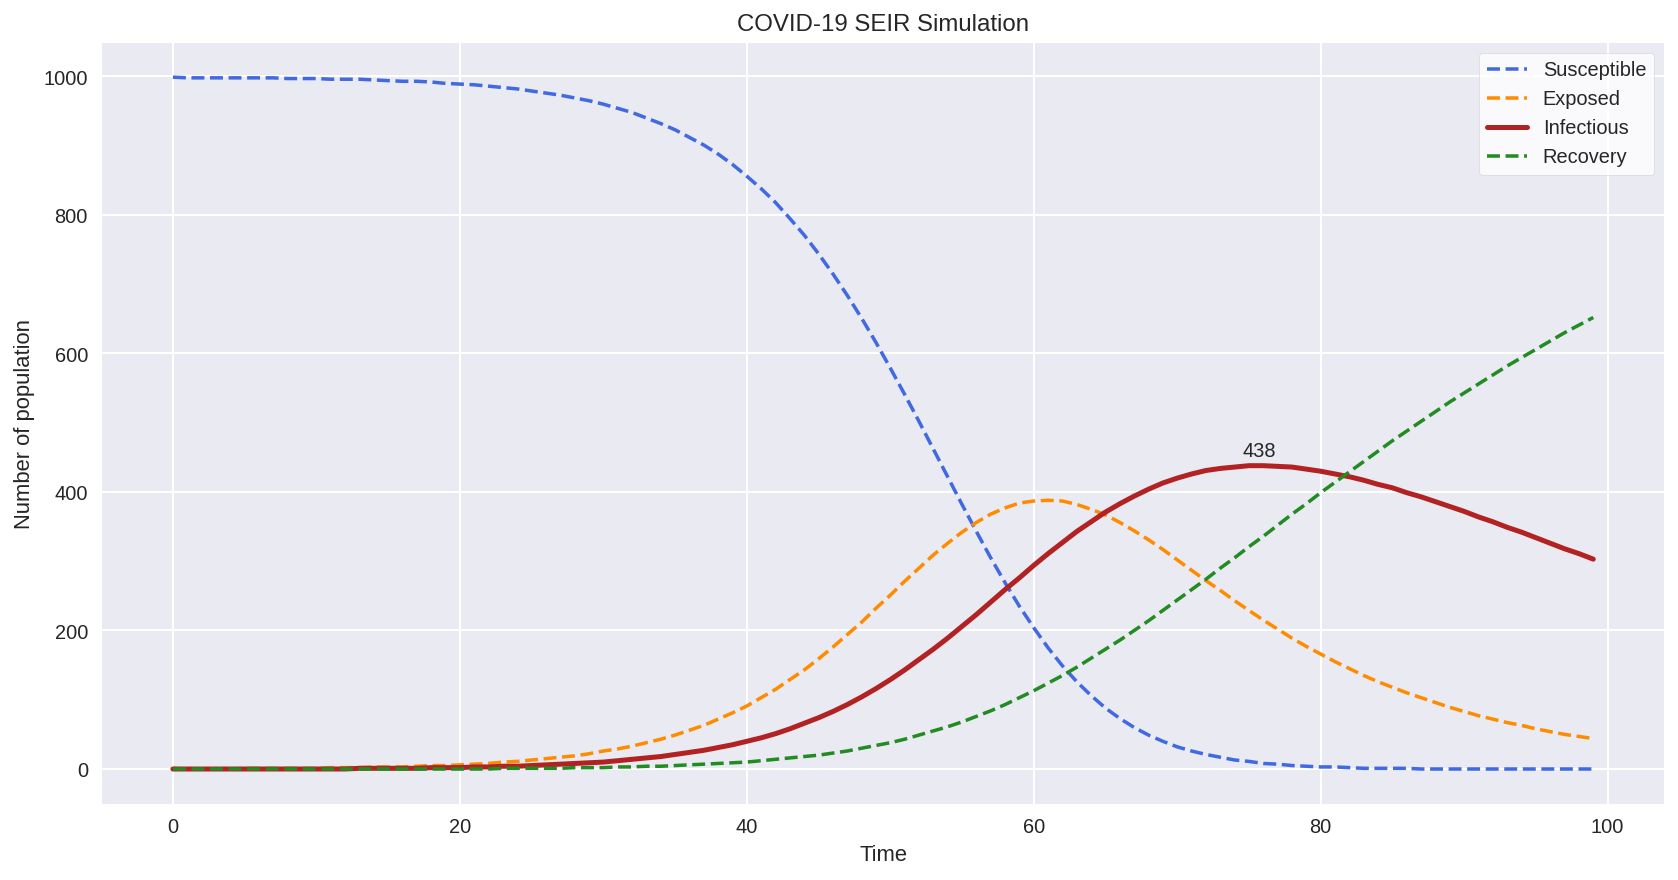

In [25]:
#Plotting the simulation
plt.figure(figsize = (14, 7)) # พล็อตขนาด
with plt.style.context('seaborn'):
  plt.title('COVID-19 SEIR Simulation') # = ชื่อกราฟ
  plt.xlabel('Time') # แกน X
  plt.ylabel('Number of population') # แกน Y
  plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--', label = 'Susceptible') #S
  plt.plot(simulationResult['Exposed'], c = 'darkorange', linestyle = '--', label = 'Exposed') #E
  plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5, label = 'Infectious') #I
  plt.plot(simulationResult['Recovery'], c = 'forestgreen', linestyle = '--', label = 'Recovery') #R
  plt.annotate(simulationResult['Infectious'].max(), 
               (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()), 
               textcoords = 'offset points', xytext = (5, 5), ha = 'center') 
  plt.legend(frameon = True, facecolor = 'white') # มีเส้นกริดพื้นหลังเป็นเส้นสีขาว
  plt.show()